In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import time
import datetime
from datetime import datetime as dt

import scienceplots
plt.style.use(['science','notebook','grid'])


import os
print(os.getcwd())
import sys

c:\FAKS\MAGISTERIJ\MODELSKA_ANALIZA_1\MA1 naloge\MA-ZaključnaNaloga\main\code\PPS_photon_propagation_simulation


## Build (ignore when doing simulation)

In [ ]:
## Below is the code for simulating photon propagation thorugh soft tissue, 
# calculating and saving the SIF coefficients

# Steps of the code:
# 1. Import (reload) necessary libraries and modules.
# 2. Define simulation parameters (e.g., tissue properties, beam characteristics).
# 3. Initialize the simulation environment (e.g., create tissue model, set up photon beam).
# 4. Run the simulation (e.g., propagate photons through the tissue).
# 5. Calculate the SIF coefficients from the simulation results.
# 6. Save the SIF coefficients to a file.

# #* 1. reload libraries from src
# importlib.reload(LACload)
# importlib.reload(EDP)
# importlib.reload(gps)
# importlib.reload(PixelTranslator)
# importlib.reload(BDE)
# importlib.reload(Simulator)


# #* 2. Define simulation parameters
# """
# Parameters:
# - spectrum_type: Type of the photon beam spectrum (e.g., "mono" for monoenergetic, "rtg" for RTG)
# - Emono: Energy of the monoenergetic photons (in MeV) [if monoenergetic spectrum]
# - Emax, alpha, beta: Parameters for the RTG spectrum (in MeV) [if rtg spectrum]
# - LAC_tissue: Linear attenuation coefficient of the tissue (in /cm) [imported from tissue_lac_importer in advance]
# - tissue_length - Length of the tissue (in cm) [we assume homogeneous tissue and square shape]
# - num_pixels: Number of pixels in the detector (assumed square shape)
# - Nsim: Number of simulated photons per beam
# """
# # parameters
# tissue_length = 20 # cm
# num_pixels_x = 7
# num_pixels_y = num_pixels_x
# # choose spectrum type
# spectrum_type = ["mono", "rtg"][1]
# # number of simulated photons
# Nsim = 10000
# # additionaly, define needed paramters of photon beam
#   # for monoenergetical specturm: Emono (energy in MeV)
#   # for rtg spectrum: Emax (energy in MeV), alpha, beta
# # fixme: for now those are defined below!


# #* 3. Initialize the simulation environment
# #$ a) Tissue properties, pixels
# tissue_box = (tissue_length, tissue_length)
# if num_pixels_x % 2 == 0 or num_pixels_y % 2 == 0 or num_pixels_x != num_pixels_y:
#     raise ValueError("Number of pixels in both directions must be odd and equal (square matrix)!")
# tissue_shape = {}
# tissue_shape["dimensions"] = tissue_box
# tissue_shape["num_pixels"] = (num_pixels_x, num_pixels_y)
# pixel_size = (tissue_length / num_pixels_x, tissue_length / num_pixels_y)  # z is not used in 2D
# print(f"Detector shape: {tissue_box} cm")
# print(f"Number of pixels: {num_pixels_x} x {num_pixels_y}")
# print(f"Pixel size: {pixel_size} cm")
# # simulator initialization
# simulator = Simulator.box_propagation_simulator2D(
#     box_dimensions = tissue_box,
#     LAC_data = LAC_data_tissue,
#     Emin_terminate = 0.001
# )

# #$ b) Pencil beam characteristics
# if spectrum_type == "mono":
#     Emono = 0.12
#     print(f"Beam type: monoenergetic; Emono={Emono}")
#     lac_value = tissue_lac_importer.get_lac_at_energy(Emono)
#     print(f"At {Emono} MeV, total linear attenuation coefficient is {lac_value:.4f} /cm"
#             f"; (mean free path = {1/lac_value:.4f} cm)")
#     pencil_beam_gps = gps.pencil_beam_gps(
#         tissue_shape = tissue_shape,
#         spectrum_type = spectrum_type,
#         Emono = Emono,
#     )
#     Ebeam = f"{Emono*1000:.0f}kev"
# elif spectrum_type == "rtg":
#     Emax = 6 # MeV
#     alpha = 1.0
#     beta = 1.2
#     Emean = Emax / 3
#     print(f"Beam type: RTG; Emax={Emax} MeV; alpha={alpha}; beta={beta}; Emean={Emean:.2f} MeV")
#     lac_value = tissue_lac_importer.get_lac_at_energy(Emean)
#     print(f"At {Emean} MeV, total linear attenuation coefficient is {lac_value:.4f} /cm"
#           f"; (mean free path = {1/lac_value:.4f} cm)")
#     pencil_beam_gps = gps.pencil_beam_gps(
#         tissue_shape = tissue_shape,
#         spectrum_type = spectrum_type,
#         Emax = Emean,
#         alpha = alpha,
#         beta = beta
#     )
#     Ebeam = f"{Emax:.0f}MV"


# # max beam index - center (middle cell) irradiation
# max_beam_index = num_pixels_y // 2
# Nupper = max_beam_index + 1
# print(f"Max beam index: {max_beam_index} (from 0 to {num_pixels_y - 1})")

# #* 4. Run the simulation
# #####! Simulation control #######
# doSimulate = 1
# if doSimulate == 1:
#     # output mapping
#     output_mapping = {"on": True}
#     subfolder_name = f"./simulation_data/{spectrum_type}_{tissue_length}cm_{num_pixels_x}pixels_{Ebeam}_{Nsim:.0e}photons"
#     # Create the folder if it does not exist
#     if not os.path.exists(subfolder_name):
#         os.makedirs(subfolder_name)
#     output_mapping["folder_name"] = subfolder_name
#     print(f"Output subfolder name: {output_mapping['folder_name']}")

#     #* SIMULATE - loop over beam indices
#     print(f"\n\nStart simulation of {spectrum_type} beams with {Nsim} photons each and energy {Ebeam}\n"
#           f"Tissue box dimensions: {tissue_box} cm; number of pixels: {num_pixels_x} x {num_pixels_y} (pixel size: {pixel_size} cm)"
#           f"\nSimulating for beam indices up to {max_beam_index}...")
#     for beam_index in range(Nupper):
#         gps_template = pencil_beam_gps.get_gps_template(beam_index=beam_index)
#         output_mapping["file_name"] = f"beam{beam_index}"
#         # simulate photon propagation
#         pp_simulation = simulator.simulate(Nsim=Nsim, SourcePhotons_template=gps_template, output_mapping=output_mapping)
# else:
#     print("\n\tSimulation is turned off.")

# #* 5. Calculate the SIF coefficients from the simulation results.
# N = num_pixels_x
# SIF_simulation = np.zeros((Nupper, N, N))
# foldername = f"{spectrum_type}_{tissue_length}cm_{num_pixels_x}pixels_{Ebeam}_{Nsim:.0e}photons"
# print(f"Foldername: {foldername}")
# # fill the matrix
# for i in range(Nupper):
#     filename = f"beam{i}.txt"
#     fpath = f"./simulation_data/{foldername}/{filename}"
#     print(f"Analyzing file: {fpath}")
#     analyzer = EDP.Edep_analyser(fpath, N,N, detector_shape=tissue_box)
#     SIF_simulation[i] = analyzer.analyse()
#     # optionally print and plot SIFs
#     #print(f"SIF for beam index {i}:\n{SIF_simulation[i]}")
#     #analyzer.plot(normalized=True, title=f"SIF for beam index {i} (of {max_beam_index})")


# # Expand SIF to 4Nbeams
# SIF_total = BDE.expand_to_4Nbeams(SIF_simulation)
# #* 6. Save the SIF coefficients
# sif_filename = f"SIF_{spectrum_type}_{tissue_length}cm_{num_pixels_x}pixels_{Ebeam}_{Nsim:.0e}photons"
# SIF_filepath = f"../../SIF_coefficients/{sif_filename}.npy"
# print(f"Saving SIF to: {SIF_filepath}")
# np.save(SIF_filepath, SIF_total)
# print("SIF saved.")


Detector shape: (20, 20) cm
Number of pixels: 7 x 7
Pixel size: (2.857142857142857, 2.857142857142857) cm
Beam type: RTG; Emax=6 MeV; alpha=1.0; beta=1.2; Emean=2.00 MeV
At 2.0 MeV, total linear attenuation coefficient is 0.0519 /cm; (mean free path = 19.2822 cm)
Max beam index: 3 (from 0 to 6)
Output subfolder name: ./simulation_data/rtg_20cm_7pixels_6MV_1e+04photons


Start simulation of rtg beams with 10000 photons each and energy 6MV
Tissue box dimensions: (20, 20) cm; number of pixels: 7 x 7 (pixel size: (2.857142857142857, 2.857142857142857) cm)
Simulating for beam indices up to 3...

Starting simulation with RTG photons: U=2.0, MV; Nsim=10000

	Progress: 10.00%
	Progress: 20.00%
	Progress: 30.00%
	Progress: 40.00%
	Progress: 50.00%
	Progress: 60.00%


KeyboardInterrupt: 

# Here, real endcode starts!

### Import LAC

In [21]:
from src import LinearAttenuationCoefficients as LACload
importlib.reload(LACload)

path = "../mac_nistxcom/mac_tissue.txt"
tissue_density = 1.06  # g/cm^3
tissue_lac_importer = LACload.LACLoader(path, tissue_density, material_name="Tissue")
energy_tissue, lac_pp_tissue, lac_cs_tissue, lac_pe_tissue, lac_total_tissue = tissue_lac_importer.get_lac_data()

#* gather lac data for simulation
LAC_data_tissue = {
    'energy': energy_tissue,  # Energy values for the linear attenuation coefficients
    'lac_cs': lac_cs_tissue,  # Linear attenuation coefficient for Compton scattering 
    'lac_pe': lac_pe_tissue,  # Linear attenuation coefficient for photoelectric effect
    'lac_pp': lac_pp_tissue,  # Linear attenuation coefficient for pair production
}

energies = [0.01,0.05,0.08,0.1,0.15,0.5,1.0,2.0] # MeV

for energy in energies:
    lac_value = tissue_lac_importer.get_lac_at_energy(energy)
    print(f"At {energy} MeV, total linear attenuation coefficient is {lac_value:.4f} /cm"
          f"; (mean free path = {1/lac_value:.4f} cm)"
          )

At 0.01 MeV, total linear attenuation coefficient is 6.5882 /cm; (mean free path = 0.1518 cm)
At 0.05 MeV, total linear attenuation coefficient is 0.2303 /cm; (mean free path = 4.3426 cm)
At 0.08 MeV, total linear attenuation coefficient is 0.1871 /cm; (mean free path = 5.3437 cm)
At 0.1 MeV, total linear attenuation coefficient is 0.1751 /cm; (mean free path = 5.7106 cm)
At 0.15 MeV, total linear attenuation coefficient is 0.1559 /cm; (mean free path = 6.4128 cm)
At 0.5 MeV, total linear attenuation coefficient is 0.1015 /cm; (mean free path = 9.8537 cm)
At 1.0 MeV, total linear attenuation coefficient is 0.0742 /cm; (mean free path = 13.4798 cm)
At 2.0 MeV, total linear attenuation coefficient is 0.0519 /cm; (mean free path = 19.2822 cm)


In [20]:
19/3

6.333333333333333

import libraries from src

In [49]:
import importlib
from src import EnergyDeposition as EDP 
from src import BeamDataExpansion as BDE
from src import gps, PixelTranslator
from src import BoxPropagationSimulator2D as Simulator

importlib.reload(EDP)
importlib.reload(gps)
importlib.reload(PixelTranslator)
importlib.reload(BDE)
importlib.reload(Simulator)

<module 'src.BoxPropagationSimulator2D' from 'c:\\FAKS\\MAGISTERIJ\\MODELSKA_ANALIZA_1\\MA1 naloge\\MA-ZaključnaNaloga\\main\\code\\PPS_photon_propagation_simulation\\src\\BoxPropagationSimulator2D.py'>

## Parameters

In [36]:
"""
Parameters:
- spectrum_type: Type of the photon beam spectrum (e.g., "mono" for monoenergetic, "rtg" for RTG)
- Emono: Energy of the monoenergetic photons (in MeV) [if monoenergetic spectrum]
- Emax, alpha, beta: Parameters for the RTG spectrum (in MeV) [if rtg spectrum]
- LAC_tissue: Linear attenuation coefficient of the tissue (in /cm) [imported from tissue_lac_importer in advance]
- tissue_length - Length of the tissue (in cm) [we assume homogeneous tissue and square shape]
- num_pixels: Number of pixels in the detector (assumed square shape)
- Nsim: Number of simulated photons per beam
"""

'\nParameters:\n- spectrum_type: Type of the photon beam spectrum (e.g., "mono" for monoenergetic, "rtg" for RTG)\n- Emono: Energy of the monoenergetic photons (in MeV) [if monoenergetic spectrum]\n- Emax, alpha, beta: Parameters for the RTG spectrum (in MeV) [if rtg spectrum]\n- LAC_tissue: Linear attenuation coefficient of the tissue (in /cm) [imported from tissue_lac_importer in advance]\n- tissue_length - Length of the tissue (in cm) [we assume homogeneous tissue and square shape]\n- num_pixels: Number of pixels in the detector (assumed square shape)\n- Nsim: Number of simulated photons per beam\n'

Define geomtery, beam characteristic

In [55]:
 
#* define parameters
tissue_length = 25 # cm
num_pixels = 15

###!!! Choose beam type
spectrum_type = ["mono","rtg"][1]


# 1. monoenergetic spectrum
Emono = 0.15 # MeV

# 2. RTG spectrum
Emax = 6.0 # MV
alpha = 1.0
beta = 1.2
#* alternative - 12MV
Emax = 12.0 # MV
alpha = 1.5
beta = 0.8

Nsim = 20000
LAC_data_tissue = LAC_data_tissue # ??
Simulator = Simulator
gps = gps
#tissue_lac_importer = tissue_lac_importer



## Simulate


Starting simulation with RTG photons: U=4.0, MV; Nsim=20000

	Progress: 10.00%
	Progress: 20.00%
	Progress: 30.00%
	Progress: 40.00%
	Progress: 50.00%
	Progress: 60.00%
	Progress: 70.00%
	Progress: 80.00%
	Progress: 90.00%
------- Simulation finished -------

Starting simulation with RTG photons: U=4.0, MV; Nsim=20000

	Progress: 10.00%
	Progress: 20.00%
	Progress: 30.00%
	Progress: 40.00%
	Progress: 50.00%
	Progress: 60.00%
	Progress: 70.00%
	Progress: 80.00%
	Progress: 90.00%
------- Simulation finished -------

Starting simulation with RTG photons: U=4.0, MV; Nsim=20000

	Progress: 10.00%
	Progress: 20.00%
	Progress: 30.00%
	Progress: 40.00%
	Progress: 50.00%
	Progress: 60.00%
	Progress: 70.00%
	Progress: 80.00%
	Progress: 90.00%
------- Simulation finished -------

Starting simulation with RTG photons: U=4.0, MV; Nsim=20000

	Progress: 10.00%
	Progress: 20.00%
	Progress: 30.00%
	Progress: 40.00%
	Progress: 50.00%
	Progress: 60.00%
	Progress: 70.00%
	Progress: 80.00%
	Progress: 90.

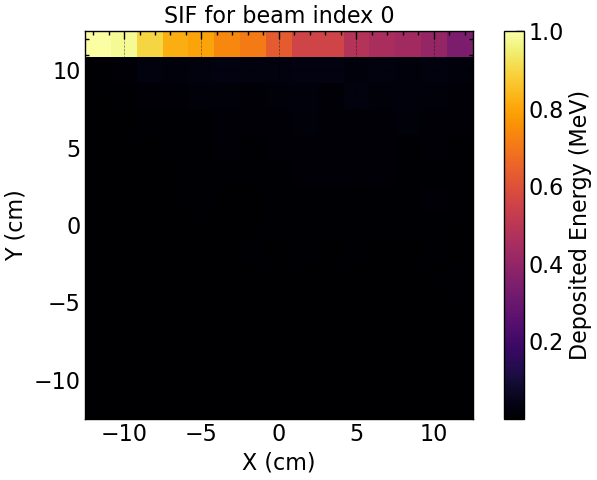

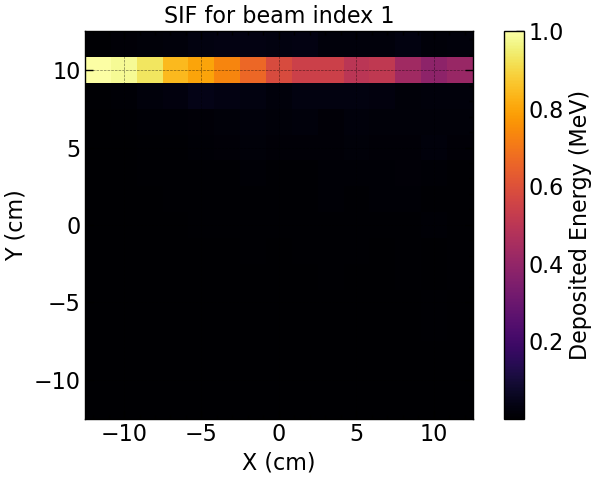

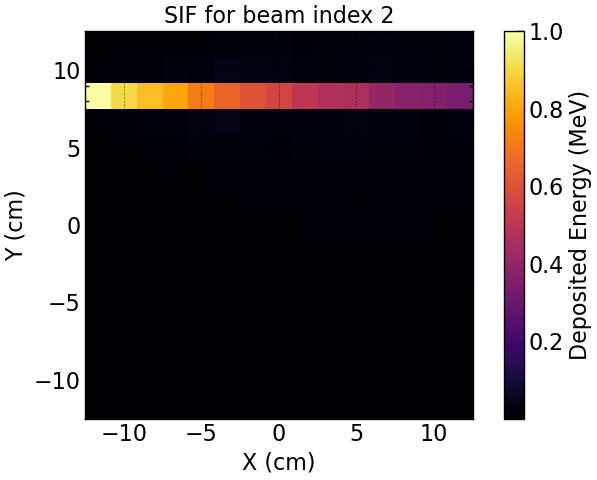

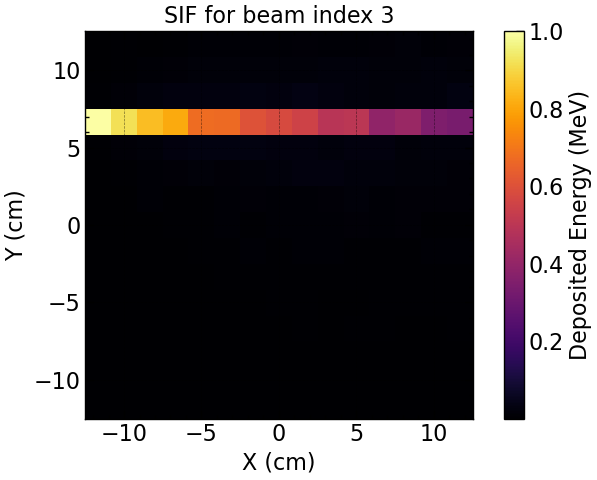

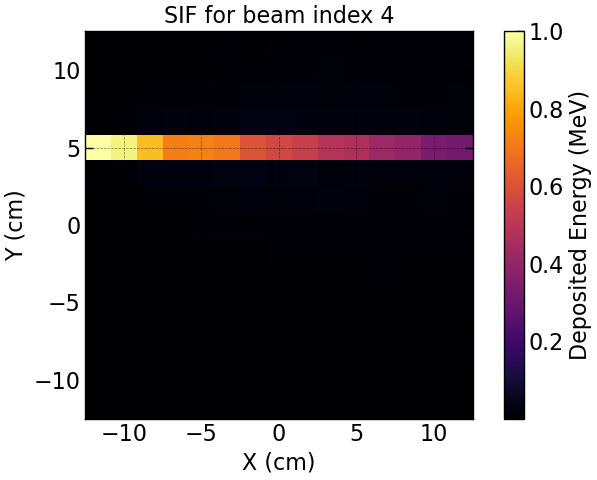

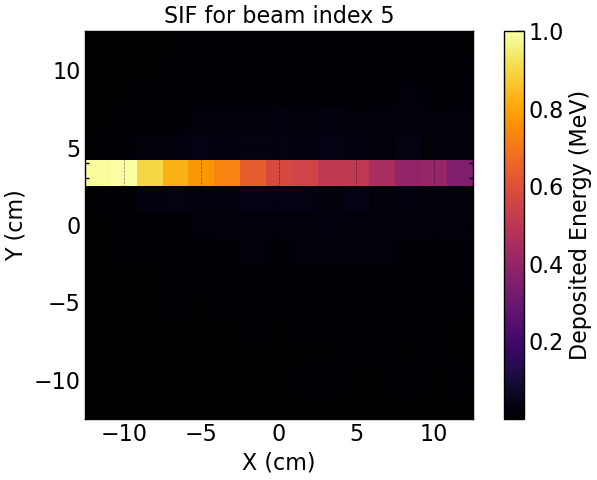

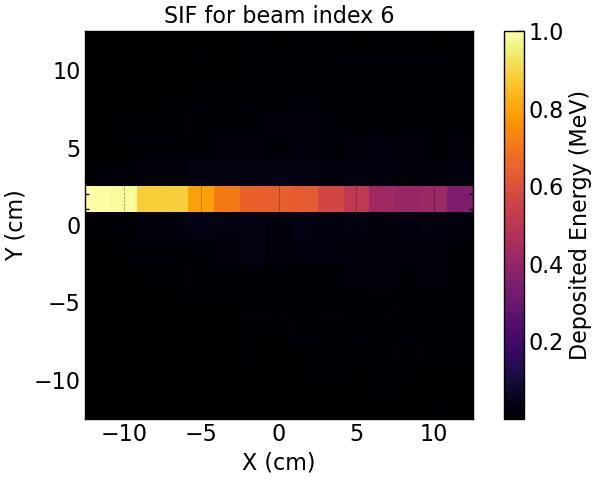

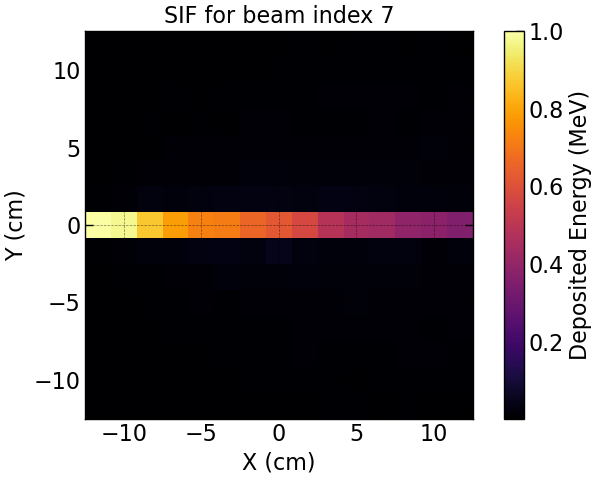

SIF saved to: ../../SIF_coefficients\SIF_rtg_25cm_15pixels_12MV_2e+04photons.npy


In [56]:
from src import PhotonPropagationSimulator 
importlib.reload(PhotonPropagationSimulator)

simulator = PhotonPropagationSimulator.photon_propagation_simulator(
    tissue_length=tissue_length,
    num_pixels=num_pixels,
    spectrum_type=spectrum_type,
    Nsim=Nsim,
    LAC_data_tissue=LAC_data_tissue,
    Simulator=Simulator,
    gps=gps,
    Emono=Emono,
    Emax=Emax,
    alpha=alpha,
    beta=beta
)

# Run the simulation
simulator.run_simulation()

# save SIF coeffitients
simulator.process_data_and_save_SIF(EDP, BDE)


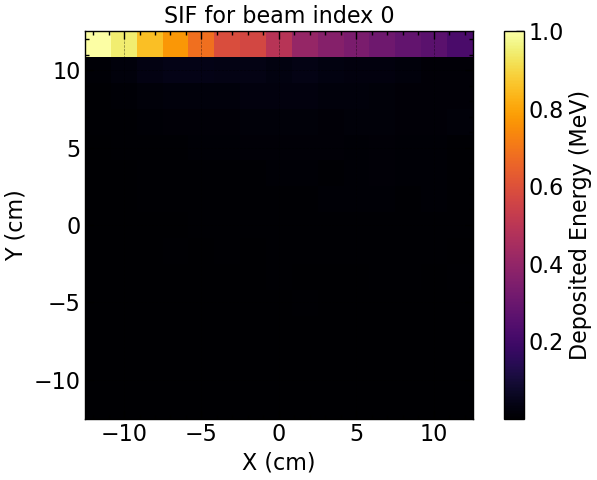

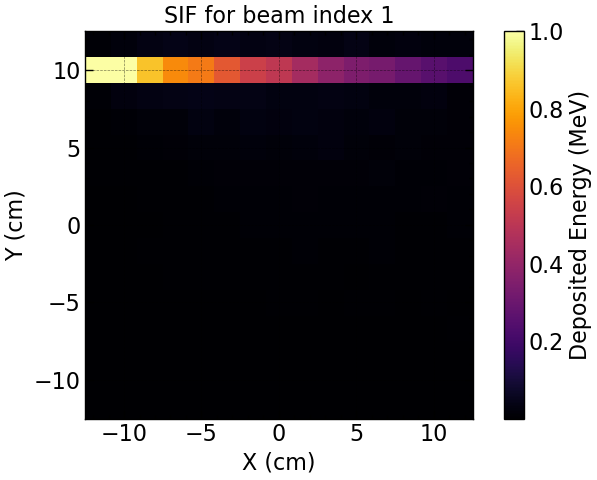

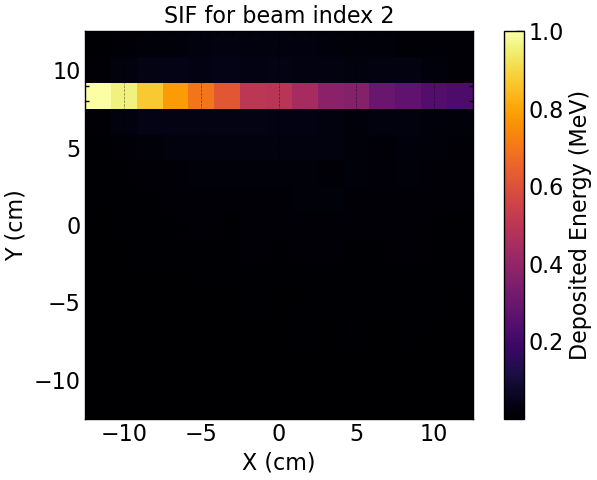

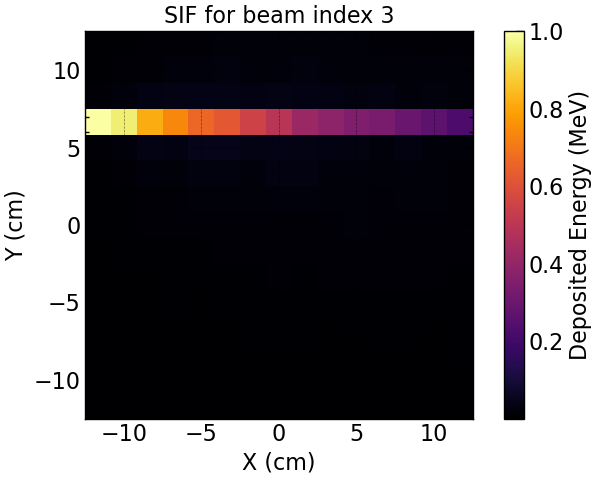

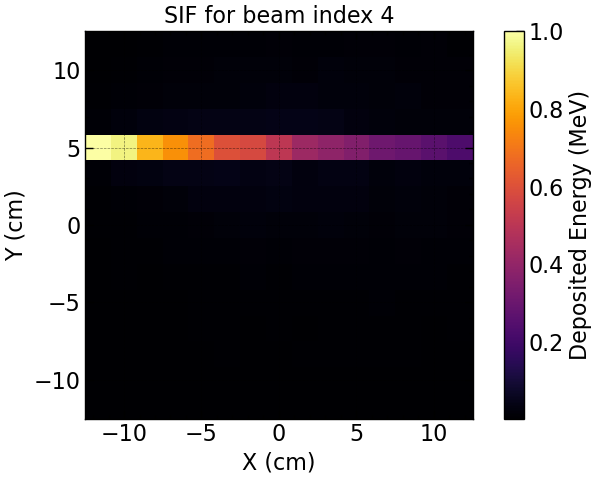

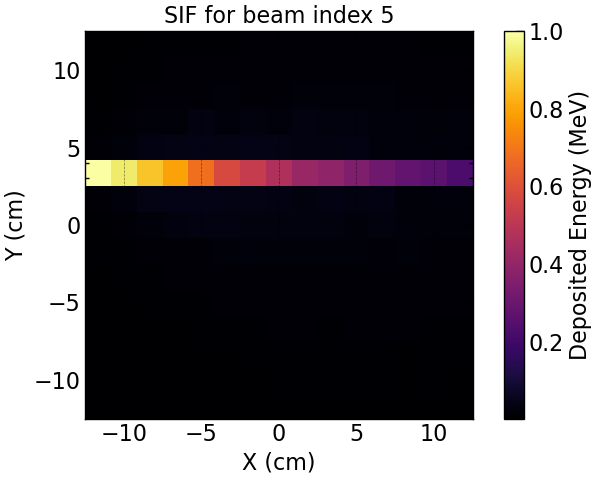

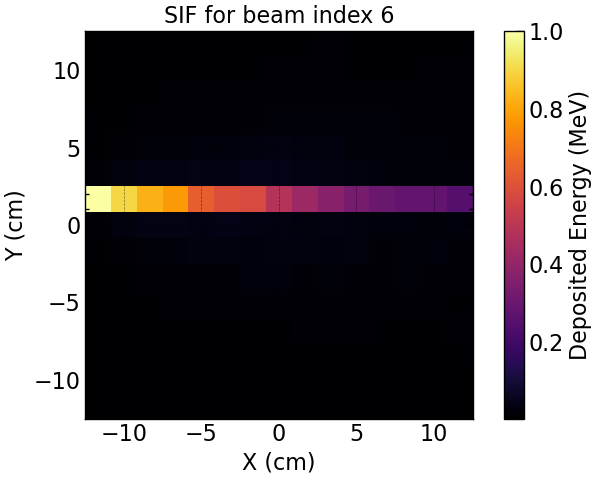

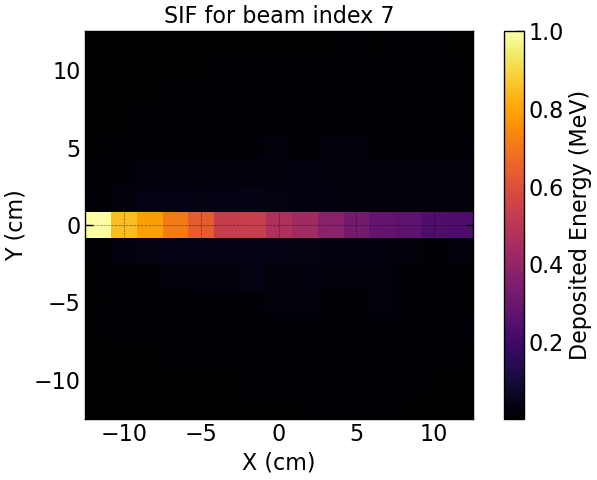

SIF saved to: ../../SIF_coefficients\SIF_rtg_25cm_15pixels_6MV_3e+04photons.npy


In [45]:
simulator.process_data_and_save_SIF(EDP, BDE)
